# boston housing

In [115]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.datasets.boston_housing import load_data
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 로딩

In [116]:
# 학습용, 테스트용 = 8 : 2
(X_train, y_train), (X_test, y_test) = load_data()

In [117]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [118]:
X_train[:1], y_train[0]

(array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
          91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
          18.72   ]]), 15.2)

### [1-1] 데이터 전처리
---
- 특성 전처리
    * 수치 데이터 : 값의 범위
    * 문자 데이터 : 수치화

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## [2] NN model 실습
---
- (1) 모델 구상
- (2) 모델 생성
- (3) 학습
- (4) 평가
- (5) 테스트

### [2-1] 모델 구상
---
- 입력 데이터 -> 13개
- 출력 데이터 -> 1개

In [120]:
model = Sequential(name="boston")

model.add(Dense(30, activation="relu", input_shape=(13,), name="hidden1"))

# 과적합 해결하기 위해서 사용, 지정된 비율만큼 node 비활성화
model.add(Dropout(0.5))
model.add(Dense(10, activation="relu", name="hidden2"))
model.add(Dense(1, activation="linear", name="output"))

In [121]:
model.summary()

Model: "boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 30)                420       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 hidden2 (Dense)             (None, 10)                310       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


### [2-2] 모델 생성
---
- Seqential 클래스의 compile 메서드
- 모델이 동작하기 위해서 필요한 설정
    * 오차 계산 함수 설정 -> loss
        - 회귀 : mae, mse, rmse
        - 분류 : crossentropy
            + 이진 : binary_croosentropy
            + 다중 : categorical_crossentropy
            + (타겟) :sparse_categorical_crossentropy 
    * W, B 최적화 방식 설정 -> optimizer
        - 기본 :rmsprop
        - adam, momonent ...
    * 모델의 성능 측정 항목 설정 -> metrics
        - 기본 : loss
- 파라미터 값들
    * str 타입으로 입력 가능
    * 객체 타입으로 입력 가능

In [122]:
model.compile(
    loss="mse",
    optimizer="adam",
)

### [2-3] 학습
---
- fit() 메서드
    * 파라미터
        - epochs=1 : 처음~끝 학습횟수
        - batch_size=32 : 학습량 크기
        - validation_split : 검증용 분리
        - validation_data : test 사용
    * 반환값 -> History 객체

In [123]:
from keras.callbacks import EarlyStopping
# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stop_cb = EarlyStopping()

In [124]:
with tf.device("/device:GPU:0"):
    result = model.fit(X_train, y_train,
                       epochs=500,
                       batch_size=20,
                       validation_data=(X_test, y_test),
                       verbose=False)
                    #    callbacks=[stop_cb])

In [125]:
# 학습 후 학습 결과 체크 -> history 객체
print(f"params : {result.params}")
print(f"history.keys() : {result.history.keys()}")
print(f"history['loss'] : {result.history['loss']}")

params : {'verbose': False, 'epochs': 500, 'steps': 21}
history.keys() : dict_keys(['loss', 'val_loss'])
history['loss'] : [46702.171875, 15165.7607421875, 8214.6455078125, 7185.30322265625, 4962.19287109375, 4694.46826171875, 3332.686279296875, 2692.808837890625, 2741.819580078125, 2416.418701171875, 2175.211181640625, 1814.146484375, 1498.934814453125, 1739.018310546875, 1443.938720703125, 1429.1441650390625, 1103.863525390625, 1050.938720703125, 945.5131225585938, 936.0103149414062, 937.2044677734375, 783.87646484375, 780.3922729492188, 744.7413330078125, 831.5757446289062, 709.9982299804688, 639.9596557617188, 601.0414428710938, 584.9140625, 509.45928955078125, 483.2137145996094, 511.04791259765625, 478.85101318359375, 476.19659423828125, 427.4103088378906, 399.99114990234375, 435.88031005859375, 401.66851806640625, 328.72015380859375, 363.9758605957031, 373.38848876953125, 363.7902526855469, 341.1461486816406, 303.0022888183594, 309.7212829589844, 277.4785461425781, 287.5184020996

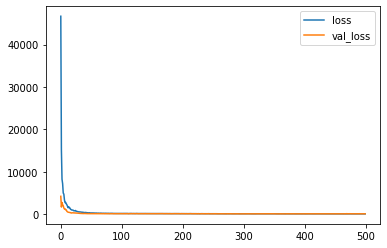

In [126]:
plt.plot(result.epoch, result.history['loss'], label="loss")
plt.plot(result.epoch, result.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

### [2-4] 평가
---
- evaluate() 메서드
    * 파라미터 : test_data, test_target
    * 반환값 : loss, compile()의 metrics에서 설정한 항목값

In [127]:
e_ret = model.evaluate(X_test, y_test)
e_ret

4/4 [==============================] - 0s 5ms/step - loss: 57.6916


57.691558837890625

In [128]:
model.predict(X_train[:1])

array([[15.006067]], dtype=float32)